# Data Science Project Notebook

In [0]:
# Data wrangling libraries.
import pandas as pd
import numpy as np

In [0]:
# Other libraries
import math

In [0]:
# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette(sns.cubehelix_palette(8, start=2))
from mpl_toolkits import mplot3d
from matplotlib.pyplot import cm

In [0]:
url_income = 'https://raw.githubusercontent.com/urehani1/491/master/Maryland_Median_Household_Income_By_Year_With_Margin_Of_Error__2007-2016.csv'
df_income = pd.read_csv(url_income)
print('File loaded')
display(df_income.head())

File loaded


,Date created,Year,MARYLAND,Allegany County,Anne Arundel County,Baltimore City,Baltimore County,Calvert County,Caroline County,Carroll County,...,Kent County,Montgomery County,Prince George's County,Queen Anne's County,Somerset County,St. Mary's County,Talbot County,Washington County,Wicomico County,Worcester County
0,2018-08-02T00:00:00.000,2014,824,2380,2647,1798,2261,6251,2996,3125,...,4924,2223,1447,5287,2958,3891,4308,2953,2234,3253
1,2018-08-02T00:00:00.000,2010,833,2826,2311,1414,2006,5064,2965,3703,...,4582,2710,1609,5181,2747,5070,3948,3327,3097,3507
2,2018-08-02T00:00:00.000,2013,693,2773,2352,1071,1944,5241,3787,3280,...,3753,1836,1380,4946,3399,5169,5176,2999,3167,3420
3,2018-08-02T00:00:00.000,2011,760,2693,3430,1536,1728,4369,4213,3709,...,4603,2758,1911,6363,3426,2717,4929,2928,3582,4653
4,2018-08-02T00:00:00.000,2007,695,2604,1651,871,1042,5845,4311,4540,...,3934,2066,2240,3760,3244,4573,3963,3313,2961,4322


In [0]:
df_income=df_income.drop(columns=['Date created'])
df_income = df_income.drop(df_income[df_income.MARYLAND < 1000].index)
df_income.head(15)

,Year,MARYLAND,Allegany County,Anne Arundel County,Baltimore City,Baltimore County,Calvert County,Caroline County,Carroll County,Cecil County,...,Kent County,Montgomery County,Prince George's County,Queen Anne's County,Somerset County,St. Mary's County,Talbot County,Washington County,Wicomico County,Worcester County
6,2013,72482,39994,85685,41988,64624,91993,46015,82073,64880,...,55695,97873,71682,80143,36106,78274,57525,55643,47536,52276
7,2008,70482,39055,82616,40087,63078,82033,54934,78348,66131,...,52934,93895,71696,77686,39426,77703,62206,51587,48614,50347
11,2012,71169,38670,87083,39077,62413,87215,48772,79304,62443,...,49969,94365,69258,79012,34454,85478,61529,52604,50204,55875
12,2015,75784,39859,90825,43192,68317,98937,51294,84506,68972,...,52274,98314,76366,83914,38692,83148,62018,55270,52153,53366
13,2010,68933,37083,80908,38186,62300,86536,55480,80291,61506,...,49017,88559,69524,78503,38134,81559,56806,51610,47702,55492
14,2016,78787,44708,95297,46604,72305,97188,49616,89529,70504,...,54210,99604,78680,79966,38546,80049,62264,54643,50015,53509
15,2007,67989,37171,80158,36894,60828,89159,48387,79803,62489,...,46693,91440,67706,75902,35553,72534,56512,50257,49981,49067
16,2011,70075,38504,82980,38478,62309,88406,50809,82553,61191,...,49795,92288,70114,75158,35426,80943,55145,52028,45788,48472
17,2009,69193,37151,79843,38458,64629,86281,49050,78418,60543,...,50585,93774,69545,75146,35621,71316,59633,48883,46404,47829
18,2014,73851,39808,86654,41895,67766,92446,49573,84500,62198,...,53288,97279,71904,80650,38376,84686,54836,54606,51927,55691


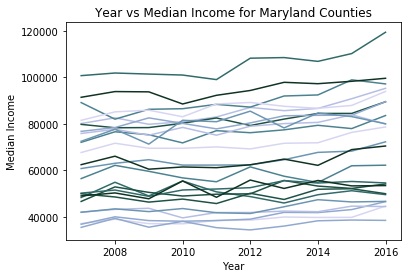

In [0]:
#counties = []
counties = list(df_income)
counties = counties[2:]
#print(counties)
color=iter(cm.rainbow(np.linspace(0,1,1)))
c=next(color)
for x in counties:
    x, y = zip(*sorted(zip(df_income['Year'], df_income[x])))
    plt.plot(x,y,label = 'dd')
plt.title('Year vs Median Income for Maryland Counties')
plt.xlabel('Year')
plt.ylabel('Median Income')
#plt.plot(x,y)
plt.show()

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = df_income[['Year']]
df_pred_income = pd.DataFrame(columns=['County', 'Income_2017', 'Income_2018', 'Income_2019'])
for i in list(df_income.columns)[2:]:
  #print(type(i))
  y = df_income[[i]]
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

  regression_model = LinearRegression()
  regression_model.fit(x_train, y_train)
  income = regression_model.predict([[2017]])
  income2 = regression_model.predict([[2018]])
  income3 = regression_model.predict([[2019]])
  #print(i,income[0][0],income2[0][0],income3[0][0])
  df_pred_income = df_pred_income.append({
      'County': i,
      'Income_2017': int(income[0][0]),
      'Income_2018': int(income2[0][0]),
      'Income_2019': int(income3[0][0])
  }, ignore_index=True)
  
# url_newincome = 'https://raw.githubusercontent.com/urehani1/491/master/maryland_income19.csv'
# df_newincome = pd.read_csv(url_newincome)
# df_newincome.head(15)
df_pred_income[['Income_2017', 'Income_2018', 'Income_2019']] = df_pred_income[['Income_2017', 'Income_2018', 'Income_2019']].astype(int)
df_pred_income.head()

,County,Income_2017,Income_2018,Income_2019
0,Allegany County,42977,43596,44216
1,Anne Arundel County,94512,96174,97835
2,Baltimore City,45677,46519,47361
3,Baltimore County,70712,71679,72646
4,Calvert County,100630,102595,104560


In [0]:
df_nces = pd.read_csv('https://media.githubusercontent.com/media/RobRoseKnows/umbc-cs-projects/master/umbc-cs491-data-science/proj/data/csv/ncesdata_md.csv')

In [0]:
df_fafsa = pd.read_csv('https://media.githubusercontent.com/media/RobRoseKnows/umbc-cs-projects/master/umbc-cs491-data-science/proj/data/csv/MD.csv')

In [0]:
df_nces.head()

,NCES School ID,State School ID,NCES District ID,State District ID,Low Grade*,High Grade*,School Name,District,County Name*,Street Address,...,Locale*,Charter,Magnet*,Title I School*,Title 1 School Wide*,Students*,Teachers*,Student Teacher Ratio*,Free Lunch*,Reduced Lunch*
0,240039000679,MD-12-120270,2400390,MD-12,9,12,Aberdeen High,Harford County Public Schools,Harford County,251 Paradise Rd,...,Suburb: Midsize,No,Yes,Yes,Yes,1485,92.33,16.1,–,–
1,240009001381,MD-30-300427,2400090,MD-30,6,12,Academy for College and Career Exploration,Baltimore City Public Schools,Baltimore city,2801 Saint Lo Drive,...,City: Large,No,No,Yes,Yes,587,35.5,16.5,–,–
2,240051001704,MD-16-161350,2400510,MD-16,9,12,Academy of Health Sciences at PGCC,Prince George's County Public Schools,Prince George's County,301 Largo Rd,...,Suburb: Large,No,Yes,No,†,431,15,28.7,–,–
3,240009000236,MD-30-300413,2400090,MD-30,9,12,Achievement Academy @ Harbor City High,Baltimore City Public Schools,Baltimore city,2201 Pinewood Avenue,...,City: Large,No,No,Yes,Yes,379,18,21.1,–,–
4,240048000773,MD-15-150789,2400480,MD-15,9,12,Albert Einstein High,Montgomery County Public Schools,Montgomery County,11135 Newport Mill Rd,...,Suburb: Large,No,No,Yes,Yes,1748,114.61,15.3,–,–


In [0]:
df_fafsa.head()

,Name,City,State,Applications_1920_Submitted_Apr19_2019,Applications_1920_Complete_Apr19_2019,Applications_1819_Submitted_Apr19_2018,Applications_1819_Complete_Apr19_2018,Applications_1819_Submitted_Jun_2018,Applications_1819_Complete_Jun_2018,Applications_1819_Submitted_Dec_2018,Applications_1819_Complete_Dec_2018
0,ABERDEEN HIGH,ABERDEEN,MD,169,160,139,131,175,162,206,192
1,ACADEMY FOR COLLEGE AND CAREER EXPLORATION,BALTIMORE,MD,49,42,45,42,47,46,53,50
2,ACADEMY OF HEALTH SCIENCES AT PGCC,LARGO,MD,82,79,78,77,78,78,82,80
3,ACADEMY OF THE HOLY CROSS,KENSINGTON,MD,91,91,80,77,83,81,84,82
4,ACHIEVEMENT ACADEMY @ HARBOR CITY HIGH,BALTIMORE,MD,36,22,34,18,37,22,48,31


In [0]:
# Convert all the school names to uppercase.
df_nces['School Name'] = df_nces['School Name'].apply(lambda x: x.upper())
# Convert Baltimore city to Baltimore City so it will merge properly.
df_nces['County Name*'] = df_nces['County Name*'].replace({'Baltimore city': 'Baltimore City'})
df_nces.head()

,NCES School ID,State School ID,NCES District ID,State District ID,Low Grade*,High Grade*,School Name,District,County Name*,Street Address,...,Locale*,Charter,Magnet*,Title I School*,Title 1 School Wide*,Students*,Teachers*,Student Teacher Ratio*,Free Lunch*,Reduced Lunch*
0,240039000679,MD-12-120270,2400390,MD-12,9,12,ABERDEEN HIGH,Harford County Public Schools,Harford County,251 Paradise Rd,...,Suburb: Midsize,No,Yes,Yes,Yes,1485,92.33,16.1,–,–
1,240009001381,MD-30-300427,2400090,MD-30,6,12,ACADEMY FOR COLLEGE AND CAREER EXPLORATION,Baltimore City Public Schools,Baltimore City,2801 Saint Lo Drive,...,City: Large,No,No,Yes,Yes,587,35.5,16.5,–,–
2,240051001704,MD-16-161350,2400510,MD-16,9,12,ACADEMY OF HEALTH SCIENCES AT PGCC,Prince George's County Public Schools,Prince George's County,301 Largo Rd,...,Suburb: Large,No,Yes,No,†,431,15,28.7,–,–
3,240009000236,MD-30-300413,2400090,MD-30,9,12,ACHIEVEMENT ACADEMY @ HARBOR CITY HIGH,Baltimore City Public Schools,Baltimore City,2201 Pinewood Avenue,...,City: Large,No,No,Yes,Yes,379,18,21.1,–,–
4,240048000773,MD-15-150789,2400480,MD-15,9,12,ALBERT EINSTEIN HIGH,Montgomery County Public Schools,Montgomery County,11135 Newport Mill Rd,...,Suburb: Large,No,No,Yes,Yes,1748,114.61,15.3,–,–


In [0]:
df_joined = df_nces.merge(df_fafsa, left_on="School Name", right_on="Name")
df_joined = df_joined.merge(df_pred_income, left_on="County Name*", right_on="County")
df_joined.head()

,NCES School ID,State School ID,NCES District ID,State District ID,Low Grade*,High Grade*,School Name,District,County Name*,Street Address,...,Applications_1819_Submitted_Apr19_2018,Applications_1819_Complete_Apr19_2018,Applications_1819_Submitted_Jun_2018,Applications_1819_Complete_Jun_2018,Applications_1819_Submitted_Dec_2018,Applications_1819_Complete_Dec_2018,County,Income_2017,Income_2018,Income_2019
0,240039000679,MD-12-120270,2400390,MD-12,9,12,ABERDEEN HIGH,Harford County Public Schools,Harford County,251 Paradise Rd,...,139,131,175,162,206,192,Harford County,81495,82190,82885
1,240039000683,MD-12-120373,2400390,MD-12,9,12,BEL AIR HIGH,Harford County Public Schools,Harford County,100 Heighe St,...,202,195,220,214,252,245,Harford County,81495,82190,82885
2,240039001380,MD-12-120385,2400390,MD-12,9,12,C. MILTON WRIGHT HIGH,Harford County Public Schools,Harford County,1301 N Fountain Green Rd,...,223,211,241,231,257,249,Harford County,81495,82190,82885
3,240039000480,MD-12-120292,2400390,MD-12,7,12,CENTER FOR EDUCATIONAL OPPORTUNITY,Harford County Public Schools,Harford County,253 Paradise Rd,...,5,<5,5,<5,5,5,Harford County,81495,82190,82885
4,240039000690,MD-12-120176,2400390,MD-12,9,12,EDGEWOOD HIGH,Harford County Public Schools,Harford County,2415 Willoughby Beach Rd,...,153,129,166,136,194,166,Harford County,81495,82190,82885


In [0]:
df_joined.columns.tolist()

['NCES School ID',
 'State School ID',
 'NCES District ID',
 'State District ID',
 'Low Grade*',
 'High Grade*',
 'School Name',
 'District',
 'County Name*',
 'Street Address',
 'City_x',
 'State_x',
 'ZIP',
 'ZIP 4-digit',
 'Phone',
 'Locale Code*',
 'Locale*',
 'Charter',
 'Magnet*',
 'Title I School*',
 'Title 1 School Wide*',
 'Students*',
 'Teachers*',
 'Student Teacher Ratio*',
 'Free Lunch*',
 'Reduced Lunch*',
 'Name',
 'City_y',
 'State_y',
 'Applications_1920_Submitted_Apr19_2019',
 'Applications_1920_Complete_Apr19_2019',
 'Applications_1819_Submitted_Apr19_2018',
 'Applications_1819_Complete_Apr19_2018',
 'Applications_1819_Submitted_Jun_2018',
 'Applications_1819_Complete_Jun_2018',
 'Applications_1819_Submitted_Dec_2018',
 'Applications_1819_Complete_Dec_2018',
 'County',
 'Income_2017',
 'Income_2018',
 'Income_2019']

In [0]:
# Get rid of any <5 values in Applications by replacing it with 0.
df_joined['Applications_1920_Submitted_Apr19_2019'] = pd.to_numeric(df_joined['Applications_1920_Submitted_Apr19_2019'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df_joined['Applications_1920_Complete_Apr19_2019'] = pd.to_numeric(df_joined['Applications_1920_Complete_Apr19_2019'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df_joined['Applications_1819_Submitted_Apr19_2018'] = pd.to_numeric(df_joined['Applications_1819_Submitted_Apr19_2018'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df_joined['Applications_1819_Complete_Apr19_2018'] = pd.to_numeric(df_joined['Applications_1819_Complete_Apr19_2018'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df_joined['Applications_1819_Submitted_Jun_2018'] = pd.to_numeric(df_joined['Applications_1819_Submitted_Jun_2018'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df_joined['Applications_1819_Complete_Jun_2018'] = pd.to_numeric(df_joined['Applications_1819_Complete_Jun_2018'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df_joined['Applications_1819_Submitted_Dec_2018'] = pd.to_numeric(df_joined['Applications_1819_Submitted_Dec_2018'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df_joined['Applications_1819_Complete_Dec_2018'] = pd.to_numeric(df_joined['Applications_1819_Complete_Dec_2018'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)

In [0]:
df_joined['Students'] = pd.to_numeric(df_joined['Students*'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df_joined['Teachers'] = pd.to_numeric(df_joined['Teachers*'].astype(str).str.replace(',',''), errors='coerce').fillna(0)
df_joined['Student_Teacher_Ratio'] = pd.to_numeric(df_joined['Student Teacher Ratio*'].astype(str).str.replace(',',''), errors='coerce').fillna(0)


In [0]:
df_joined['Applications_1920_Completed_Submitted_Perc_Apr19_2019'] = df_joined['Applications_1920_Complete_Apr19_2019'] / df_joined['Applications_1920_Submitted_Apr19_2019']
df_joined['Applications_1819_Completed_Submitted_Perc_Apr19_2018'] = df_joined['Applications_1819_Complete_Apr19_2018'] / df_joined['Applications_1819_Submitted_Apr19_2018']
df_joined['Applications_1920_Completed_Submitted_Perc_Apr19_2019'] = df_joined['Applications_1920_Completed_Submitted_Perc_Apr19_2019'].fillna(0)
df_joined['Applications_1819_Completed_Submitted_Perc_Apr19_2018'] = df_joined['Applications_1819_Completed_Submitted_Perc_Apr19_2018'].fillna(0)

In [0]:
df_joined['Applications_1920_Complete_Students_Perc_Apr19_2019'] = df_joined['Applications_1920_Complete_Apr19_2019'] / df_joined['Students']
df_joined['Applications_1819_Complete_Students_Perc_Apr19_2018'] = df_joined['Applications_1819_Complete_Apr19_2018'] / df_joined['Students']
df_joined['Applications_1920_Complete_Students_Perc_Apr19_2019'] = df_joined['Applications_1920_Complete_Students_Perc_Apr19_2019'].fillna(0)
df_joined['Applications_1819_Complete_Students_Perc_Apr19_2018'] = df_joined['Applications_1819_Complete_Students_Perc_Apr19_2018'].fillna(0)

In [0]:
df_joined['Applications_1920_Submitted_Students_Perc_Apr19_2019'] = df_joined['Applications_1920_Submitted_Apr19_2019'] / df_joined['Students']
df_joined['Applications_1819_Submitted_Students_Perc_Apr19_2018'] = df_joined['Applications_1819_Submitted_Apr19_2018'] / df_joined['Students']
df_joined['Applications_1920_Submitted_Students_Perc_Apr19_2019'] = df_joined['Applications_1920_Submitted_Students_Perc_Apr19_2019'].fillna(0)
df_joined['Applications_1819_Submitted_Students_Perc_Apr19_2018'] = df_joined['Applications_1819_Submitted_Students_Perc_Apr19_2018'].fillna(0)

In [0]:
df_joined['City'] = df_joined['City_x']
df_joined['State'] = df_joined['State_x']
df_joined.drop('County Name*', axis=1, inplace=True)
df_joined.drop('City_x', axis=1, inplace=True)
df_joined.drop('City_y', axis=1, inplace=True)
df_joined.drop('State_x', axis=1, inplace=True)
df_joined.drop('State_y', axis=1, inplace=True)
df_joined.drop('Name', axis=1, inplace=True)
df_joined.drop('Students*', axis=1, inplace=True)
df_joined.drop('Teachers*', axis=1, inplace=True)
df_joined.drop('Student Teacher Ratio*', axis=1, inplace=True)

In [0]:
df_joined.rename(columns={
    'Low Grade*': 'Low_Grade',
    'High Grade*': 'High_Grade',
    'Locale Code*': 'Locale_Code',
    'Locale*': 'Locale',
    'Magnet*': 'Magnet',
    'Title I School*': 'Title_I_School',
    'Title 1 School Wide*': 'Title_1_School_Wide',
    'Free Lunch*': 'Free_Lunch',
    'Reduced Lunch*': 'Reduced_Lunch'
}, inplace=True)

In [0]:
df_joined['High_Grade'] = df_joined['High_Grade'].astype('int8')
df_joined['Low_Grade'] = df_joined['Low_Grade'].astype('int8')
df_joined['Grades'] = df_joined['High_Grade'] - df_joined['Low_Grade'] + 1

## Checking Values

We want to check the possible unique values of all the categorical variables so we can get a better idea of the data structure.

First up is Free Lunch and Reduced Lunch, according to the data download, `–` means that data was missing and `†` means that data didn't meet the quality standards. If all we have in a column is missing data and zeros, we likely are not going to get any meaningful information from that column.

In [0]:
print(df_joined['Free_Lunch'].unique())
print(df_joined['Reduced_Lunch'].unique())
print(df_joined['State'].unique())

['–' '0']
['–' '0']
['MD']


In [0]:
# Since all that's in the Free_Lunch and Reduced_Lunch columns is '-' and 0, we'll just drop them.
df_joined.drop('Free_Lunch', axis=1, inplace=True)
df_joined.drop('Reduced_Lunch', axis=1, inplace=True)
df_joined.drop('State', axis=1, inplace=True)

In [0]:
print(df_joined['City'].unique())
print(df_joined['County'].unique())
print(df_joined['Magnet'].unique())
print(df_joined['Charter'].unique())
print(df_joined['Locale'].unique())
print(df_joined['Locale_Code'].unique())
print(df_joined['Title_I_School'].unique())
print(df_joined['Title_1_School_Wide'].unique())
print(df_joined['Grades'].unique())

['Aberdeen' 'Bel Air' 'Edgewood' 'Fallston' 'Havre de Grace' 'Joppa'
 'Pylesville' 'Baltimore' 'Largo' 'Bladensburg' 'Bowie' 'Capitol Heights'
 'Springdale' 'Laurel' 'Cheltenham' 'Temple Hills' 'Upper Marlboro'
 'Lanham' 'Greenbelt' 'Landover' 'Fort Washington' 'Brandywine'
 'Beltsville' 'Hyattsville' 'Oxon Hill' 'Riverdale' 'Forestville'
 'Clinton' 'Kensington' 'Bethesda' 'Clarksburg' 'Rockville' 'Damascus'
 'Gaithersburg' 'Silver Spring' 'Germantown' 'Burtonsville' 'Poolesville'
 'Sandy Spring' 'Potomac' 'Cumberland' 'Cresaptown' 'Frostburg'
 'Annapolis' 'Gambrills' 'Pasadena' 'Hanover' 'Glen Burnie' 'Ft Meade'
 'Millersville' 'Severna Park' 'Edgewater' 'Harwood' 'Columbia'
 'Ellicott City' 'Glenelg' 'Marriottsville' 'Fulton' 'Clarksville'
 'Hagerstown' 'Boonsboro' 'Clear Spring' 'Hancock' 'Smithsburg'
 'Williamsport' 'Chesapeake City' 'Elkton' 'North East' 'Perryville'
 'Brunswick' 'Thurmont' 'Frederick' 'Middletown' 'Ijamsville'
 'Walkersville' 'Prince Frederick' 'Huntingtown' 'Owi

## Graphs of Predictor Variables

Lets do some neat count graphs to see the spread of certain categories!

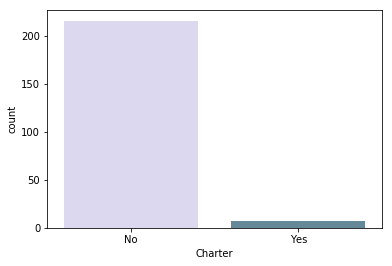

In [0]:
ax_charter = sns.countplot(x='Charter', data=df_joined, palette=sns.cubehelix_palette(3, start=2))

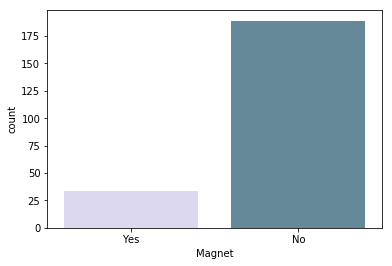

In [0]:
ax_magnet = sns.countplot(x='Magnet', data=df_joined, palette=sns.cubehelix_palette(3, start=2))

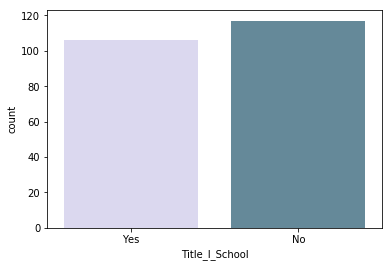

In [0]:
ax_title_I_school = sns.countplot(x='Title_I_School', data=df_joined, palette=sns.cubehelix_palette(3, start=2))

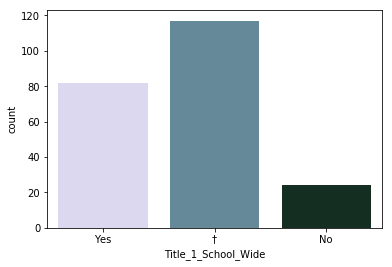

In [0]:
ax_title_1_school_wide = sns.countplot(x='Title_1_School_Wide', data=df_joined, palette=sns.cubehelix_palette(3, start=2))

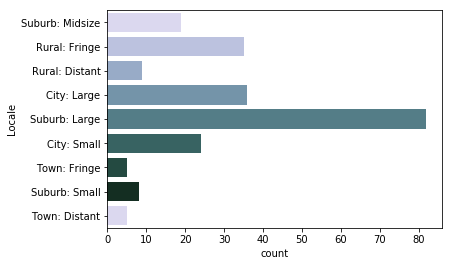

In [0]:
ax_locale = sns.countplot(y='Locale', data=df_joined, palette=sns.cubehelix_palette(8, start=2))

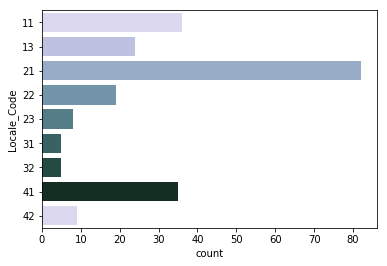

In [0]:
ax_locale_code = sns.countplot(y='Locale_Code', data=df_joined, palette=sns.cubehelix_palette(8, start=2))

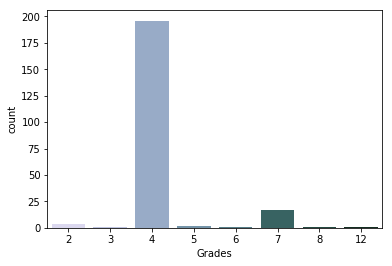

In [0]:
ax_grades = sns.countplot(x='Grades', data=df_joined, palette=sns.cubehelix_palette(8, start=2))

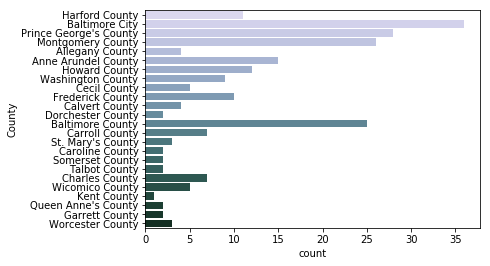

In [0]:
ax_county = sns.countplot(y='County', data=df_joined, palette=sns.cubehelix_palette(24, start=2))

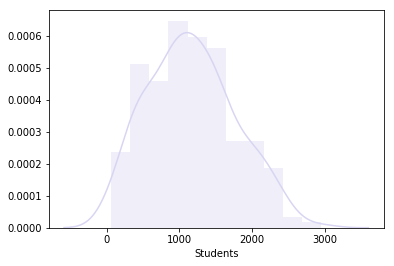

In [0]:
ax_students = sns.distplot(df_joined['Students'], axlabel="Students")

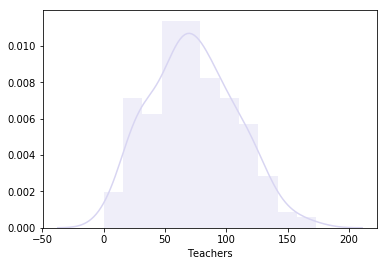

In [0]:
ax_teachers = sns.distplot(df_joined['Teachers'], axlabel="Teachers")

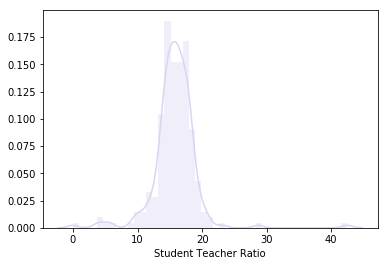

In [0]:
ax_student_teacher_ratio = sns.distplot(df_joined['Student_Teacher_Ratio'], axlabel="Student Teacher Ratio")

## Checking Correlation for Similar Columns



In [0]:
df_joined['Locale_Code_Coded'] = df_joined['Locale_Code'].astype('category').cat.codes
df_joined['Locale_Coded'] = df_joined['Locale'].astype('category').cat.codes

In [0]:
# Checking the correlation between Locale category and Locale Code
print(df_joined.corr()['Locale_Coded']['Locale_Code_Coded'])

0.39675464201624266


In [0]:
df_joined.drop('Locale_Coded', axis=1, inplace=True)
df_joined.drop('Locale_Code_Coded', axis=1, inplace=True)

Looks like `Locale_Code` isn't just a duplicate of `Locale`, so they both get to stay in! For the actual analysis though, I'll have to one hot encode them.

Lets do that now (one-hot encode all the categorical variables)! I do plan on label encoding "Yes" to 1 and "No" to 0 for the ones that are only Yes and No, and don't have any missing data.

## Encoding Categories

This is important because typically categories aren't able to be processed rawly by most algorithms and techniques, so we need to convert them to a numerical value.

### Label Encoding

First lets encode the Yes and No categories as int8, which can be properly processed by machine learning algorithms.

In [0]:
df_joined['Charter'] = df_joined['Charter'].map({'Yes': 1, 'No': 0}).astype('int8')
df_joined['Magnet'] = df_joined['Magnet'].map({'Yes': 1, 'No': 0}).astype('int8')
df_joined['Title_I_School'] = df_joined['Title_I_School'].map({'Yes': 1, 'No': 0}).astype('int8')
print(df_joined['Charter'].unique())
print(df_joined['Magnet'].unique())
print(df_joined['Title_I_School'].unique())

[0 1]
[1 0]
[1 0]


Nice! That worked out nicely. Now lets move on to the other categories.


### One-Hot Encoding

One-hot encoding converts each category to a 1 or 0 in its own column. Very useful for machine learning and data science techniques as it converts categories without possibly losing information like you can in label encoding with n > 2.

In [0]:
df_joined['Locale_Code'] = df_joined['Locale_Code'].astype('category')
df_joined['ZIP'] = df_joined['ZIP'].astype('category')
df_joined['City'] = df_joined['City'].astype('category')
df_joined['District'] = df_joined['District'].astype('category')
df_joined['County'] = df_joined['County'].astype('category')
df_joined = df_joined.join(pd.get_dummies(df_joined[['Title_1_School_Wide', 'Locale', 'Locale_Code', 'ZIP', 'City', 'District', 'County']]))

In [0]:

print(df_joined.columns.tolist())

['NCES School ID', 'State School ID', 'NCES District ID', 'State District ID', 'Low_Grade', 'High_Grade', 'School Name', 'District', 'Street Address', 'ZIP', 'ZIP 4-digit', 'Phone', 'Locale_Code', 'Locale', 'Charter', 'Magnet', 'Title_I_School', 'Title_1_School_Wide', 'Applications_1920_Submitted_Apr19_2019', 'Applications_1920_Complete_Apr19_2019', 'Applications_1819_Submitted_Apr19_2018', 'Applications_1819_Complete_Apr19_2018', 'Applications_1819_Submitted_Jun_2018', 'Applications_1819_Complete_Jun_2018', 'Applications_1819_Submitted_Dec_2018', 'Applications_1819_Complete_Dec_2018', 'County', 'Income_2017', 'Income_2018', 'Income_2019', 'Students', 'Teachers', 'Student_Teacher_Ratio', 'Applications_1920_Completed_Submitted_Perc_Apr19_2019', 'Applications_1819_Completed_Submitted_Perc_Apr19_2018', 'Applications_1920_Complete_Students_Perc_Apr19_2019', 'Applications_1819_Complete_Students_Perc_Apr19_2018', 'Applications_1920_Submitted_Students_Perc_Apr19_2019', 'Applications_1819_Subm

That's a lot of columns, but we need to delete all the columns we're not going to use in our analysis like the school ids and school codes.

In [0]:
# Drop all the ones we one-hot encoded
df_joined.drop('Title_1_School_Wide', axis=1, inplace=True)
df_joined.drop('Locale', axis=1, inplace=True)
df_joined.drop('Locale_Code', axis=1, inplace=True)
df_joined.drop('ZIP', axis=1, inplace=True)
df_joined.drop('City', axis=1, inplace=True)
df_joined.drop('District', axis=1, inplace=True)
df_joined.drop('County', axis=1, inplace=True)

In [0]:
# Drop all the unneccessary columns.
df_joined.drop('Phone', axis=1, inplace=True)
df_joined.drop('ZIP 4-digit', axis=1, inplace=True)
df_joined.drop('Street Address', axis=1, inplace=True)
df_joined.drop('School Name', axis=1, inplace=True)
df_joined.drop('NCES School ID', axis=1, inplace=True)
df_joined.drop('State School ID', axis=1, inplace=True)
df_joined.drop('NCES District ID', axis=1, inplace=True)
df_joined.drop('State District ID', axis=1, inplace=True)

In [0]:
def pretty_density_plot(titles, texta=(1, "right")):
    sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
    
    df_temp = df_joined[titles]

    df_temp = pd.melt(df_temp, id_vars=[], var_name='Year', value_name="Students")
    
    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(len(titles), start=2)
    g = sns.FacetGrid(df_temp, row="Year", hue="Year", aspect=15, height=1, palette=pal)

    # Draw the densities in a few steps
    g.map(sns.kdeplot, "Students", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
    g.map(sns.kdeplot, "Students", clip_on=False, color="w", lw=2, bw=.2)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)


    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(texta[0], .2, label.replace('_', ' '), fontweight="bold", color=color,
            ha=texta[1], va="center", transform=ax.transAxes)
    
    g.map(label, "Students")

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-.25)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)

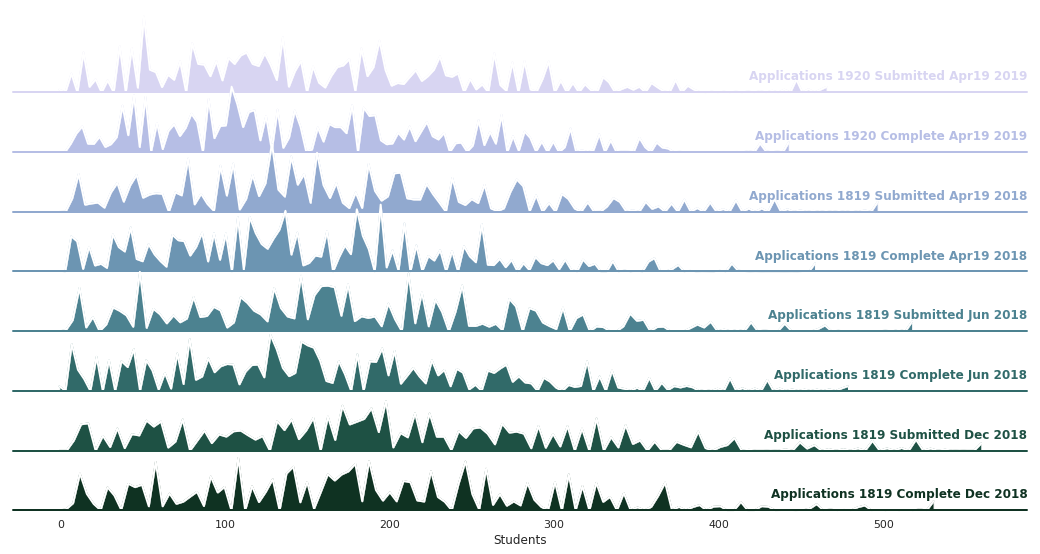

In [0]:
raw_cols = ['Applications_1920_Submitted_Apr19_2019',
            'Applications_1920_Complete_Apr19_2019',
            'Applications_1819_Submitted_Apr19_2018',
            'Applications_1819_Complete_Apr19_2018',
            'Applications_1819_Submitted_Jun_2018',
            'Applications_1819_Complete_Jun_2018',
            'Applications_1819_Submitted_Dec_2018',
            'Applications_1819_Complete_Dec_2018']
pretty_density_plot(raw_cols, (1, "right"))

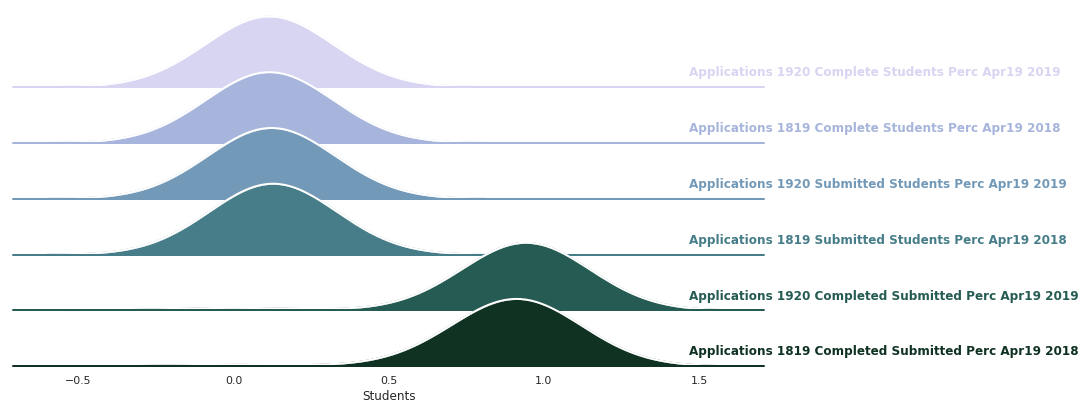

In [0]:
perc_cols =  ['Applications_1920_Complete_Students_Perc_Apr19_2019',
              'Applications_1819_Complete_Students_Perc_Apr19_2018',
              'Applications_1920_Submitted_Students_Perc_Apr19_2019',
              'Applications_1819_Submitted_Students_Perc_Apr19_2018',
             'Applications_1920_Completed_Submitted_Perc_Apr19_2019',
              'Applications_1819_Completed_Submitted_Perc_Apr19_2018']
pretty_density_plot(perc_cols, (.9, "left"))

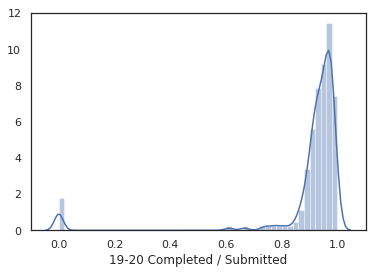

In [0]:
ax_completed_2019 = sns.distplot(df_joined['Applications_1920_Completed_Submitted_Perc_Apr19_2019'], axlabel="19-20 Completed / Submitted")

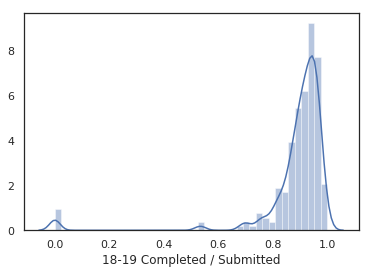

In [0]:
ax_completed_2018 = sns.distplot(df_joined['Applications_1819_Completed_Submitted_Perc_Apr19_2018'], axlabel="18-19 Completed / Submitted")

## Data Descriptions

Lets get some basic statisics about the data so we can put that in our analysis.

In [0]:
df_joined[raw_cols].describe()

,Applications_1920_Submitted_Apr19_2019,Applications_1920_Complete_Apr19_2019,Applications_1819_Submitted_Apr19_2018,Applications_1819_Complete_Apr19_2018,Applications_1819_Submitted_Jun_2018,Applications_1819_Complete_Jun_2018,Applications_1819_Submitted_Dec_2018,Applications_1819_Complete_Dec_2018
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,149.757848,142.237668,155.775785,143.076233,167.188341,153.856502,188.004484,175.390135
std,94.614222,91.516267,95.612270,90.243557,100.601481,94.887591,110.647785,104.801981
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,80.500000,73.500000,83.500000,75.500000,92.000000,80.500000,105.500000,95.500000
50%,134.000000,126.000000,143.000000,133.000000,160.000000,147.000000,184.000000,172.000000
75%,214.000000,200.500000,212.000000,195.500000,229.000000,213.500000,258.000000,244.500000
max,465.000000,442.000000,496.000000,458.000000,517.000000,478.000000,559.000000,530.000000


In [0]:
df_joined[perc_cols].describe()

,Applications_1920_Complete_Students_Perc_Apr19_2019,Applications_1819_Complete_Students_Perc_Apr19_2018,Applications_1920_Submitted_Students_Perc_Apr19_2019,Applications_1819_Submitted_Students_Perc_Apr19_2018,Applications_1920_Completed_Submitted_Perc_Apr19_2019,Applications_1819_Completed_Submitted_Perc_Apr19_2018
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,0.114366,0.115254,0.121558,0.126914,0.904644,0.885486
std,0.042031,0.040626,0.040843,0.039848,0.182357,0.150688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.091021,0.091294,0.098464,0.102305,0.915466,0.877690
50%,0.116360,0.118255,0.124521,0.129955,0.946809,0.920635
75%,0.142247,0.141744,0.147608,0.151178,0.973534,0.950857
max,0.209890,0.216355,0.213187,0.232453,1.000000,1.000000


In [0]:
predictor_cols = df_joined.columns.difference(perc_cols+raw_cols)
print(predictor_cols)

Index(['Charter', 'City_Aberdeen', 'City_Accident', 'City_Annapolis',
       'City_Baltimore', 'City_Bel Air', 'City_Beltsville', 'City_Berlin',
       'City_Bethesda', 'City_Bladensburg',
       ...
       'ZIP_21811', 'ZIP_21817', 'ZIP_21837', 'ZIP_21851', 'ZIP_21853',
       'ZIP_21863', 'ZIP_21901', 'ZIP_21903', 'ZIP_21915', 'ZIP_21921'],
      dtype='object', length=358)


## Now for Some Machine Learning

I'm first going to try applying a LightGBM model to the dataset, as I'll then be able to get feature importances so I can remove not useful ones. LightGBM is also fairly fast for how powerful it is, so I should be able to train it fairly quickly.

First, I'm going to setup some handy functions to do it for us.

In [0]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

In [0]:
# Taken from: https://github.com/Microsoft/LightGBM/blob/master/examples/python-guide/simple_example.py
def lightgbm_train_and_predict(X_train, X_test, y_train, y_test):
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

    # specify your configurations as a dict
    params = {
        'boosting_type': 'gbdt',
        'objective': 'regression',
        'metric': {'l2', 'l1'},
        'num_leaves': 31,
        'learning_rate': 0.05,
        'feature_fraction': 0.9,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'verbose': 0
    }
#     gbm = lgb.LGBMModel(params,
#                 lgb_train,
#                 num_boost_round=1000,
#                 valid_sets=lgb_eval,
#                 early_stopping_rounds=100)
    print('Starting training...')
    # train
    gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_eval,
                early_stopping_rounds=100, verbose_eval=10)

    print('Saving model...')
    # save model to file
    gbm.save_model('model.txt')

    print('Starting predicting...')
    # predict
    y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
    # eval
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    print('The rmse of prediction is:', rmse)
    return gbm, rmse

In [0]:
rmse_for_target = {}
def split_and_train(target, predictors=predictor_cols):
    X_train, X_test, y_train, y_test = train_test_split(df_joined[predictors], df_joined[target], test_size=0.33, random_state=1337)
    print("Split done, calling trainer")
    model, rmse = lightgbm_train_and_predict(X_train, X_test, y_train, y_test)
    print("Done! Printing feature importances...")
    rmse_for_target[target] = rmse
    feat_importances = pd.Series(model.feature_importance(), index=predictors)
    feat_importances.nlargest(15).plot(kind='barh')
    return rmse

Now we need to actually do the training, we'll do the training with all values, then we'll try only taking the most important of each and train again.

### Percentages

#### First Iteration

In [0]:
RMSE_full_features_percentage = []

Split done, calling trainer
Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l2: 0.00148033	valid_0's l1: 0.0291636
[20]	valid_0's l2: 0.00135021	valid_0's l1: 0.0278447
[30]	valid_0's l2: 0.00130118	valid_0's l1: 0.0273297
[40]	valid_0's l2: 0.00128164	valid_0's l1: 0.0271176
[50]	valid_0's l2: 0.00128309	valid_0's l1: 0.0271312
[60]	valid_0's l2: 0.00128948	valid_0's l1: 0.0272492
[70]	valid_0's l2: 0.00130788	valid_0's l1: 0.027482
[80]	valid_0's l2: 0.00130823	valid_0's l1: 0.0275249
[90]	valid_0's l2: 0.00132732	valid_0's l1: 0.0277225
[100]	valid_0's l2: 0.00134514	valid_0's l1: 0.0280763
[110]	valid_0's l2: 0.0013296	valid_0's l1: 0.0279316
[120]	valid_0's l2: 0.00134283	valid_0's l1: 0.0282843
[130]	valid_0's l2: 0.00133978	valid_0's l1: 0.0282616
[140]	valid_0's l2: 0.00135315	valid_0's l1: 0.0283736
Early stopping, best iteration is:
[41]	valid_0's l2: 0.00128104	valid_0's l1: 0.0271224
Saving model...
Starting predicting...
T

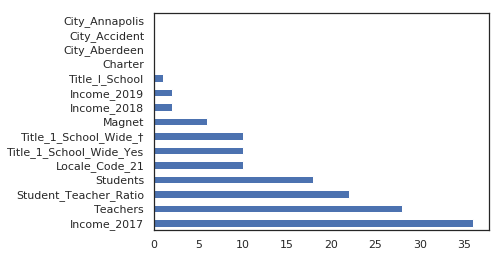

In [0]:
RMSE_full_features_percentage.append(split_and_train('Applications_1920_Submitted_Students_Perc_Apr19_2019'))

Split done, calling trainer
Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l2: 0.0014199	valid_0's l1: 0.0297901
[20]	valid_0's l2: 0.00136483	valid_0's l1: 0.029263
[30]	valid_0's l2: 0.00130148	valid_0's l1: 0.0284283
[40]	valid_0's l2: 0.00132204	valid_0's l1: 0.0287152
[50]	valid_0's l2: 0.0012884	valid_0's l1: 0.0281697
[60]	valid_0's l2: 0.00132974	valid_0's l1: 0.028526
[70]	valid_0's l2: 0.00135318	valid_0's l1: 0.0287865
[80]	valid_0's l2: 0.00135795	valid_0's l1: 0.0287105
[90]	valid_0's l2: 0.00137301	valid_0's l1: 0.0289325
[100]	valid_0's l2: 0.00139372	valid_0's l1: 0.0290212
[110]	valid_0's l2: 0.00143448	valid_0's l1: 0.0292379
[120]	valid_0's l2: 0.00144516	valid_0's l1: 0.0294316
[130]	valid_0's l2: 0.00146352	valid_0's l1: 0.0293666
[140]	valid_0's l2: 0.00145996	valid_0's l1: 0.0291359
[150]	valid_0's l2: 0.00148537	valid_0's l1: 0.0295475
Early stopping, best iteration is:
[50]	valid_0's l2: 0.0012884	valid_0's l1

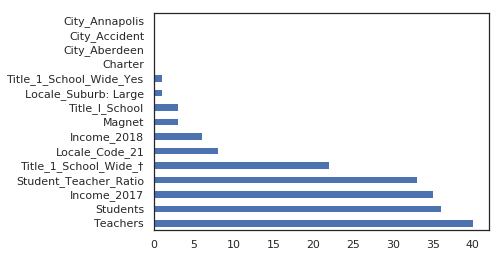

In [0]:
RMSE_full_features_percentage.append(split_and_train('Applications_1819_Submitted_Students_Perc_Apr19_2018', predictors=predictor_cols.difference(['Income_2019'])))

Split done, calling trainer
Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l2: 0.00167252	valid_0's l1: 0.0303657
[20]	valid_0's l2: 0.0014816	valid_0's l1: 0.0288408
[30]	valid_0's l2: 0.00141569	valid_0's l1: 0.0281925
[40]	valid_0's l2: 0.00138086	valid_0's l1: 0.0277658
[50]	valid_0's l2: 0.00136061	valid_0's l1: 0.0274859
[60]	valid_0's l2: 0.001347	valid_0's l1: 0.027259
[70]	valid_0's l2: 0.00135067	valid_0's l1: 0.0273789
[80]	valid_0's l2: 0.00133377	valid_0's l1: 0.0272236
[90]	valid_0's l2: 0.0013292	valid_0's l1: 0.0273324
[100]	valid_0's l2: 0.00132798	valid_0's l1: 0.0275578
[110]	valid_0's l2: 0.00130516	valid_0's l1: 0.0275423
[120]	valid_0's l2: 0.00130952	valid_0's l1: 0.0278828
[130]	valid_0's l2: 0.00130458	valid_0's l1: 0.0277616
[140]	valid_0's l2: 0.00131681	valid_0's l1: 0.0279158
[150]	valid_0's l2: 0.00132428	valid_0's l1: 0.0281312
[160]	valid_0's l2: 0.00132882	valid_0's l1: 0.0281835
[170]	valid_0's l2: 0.

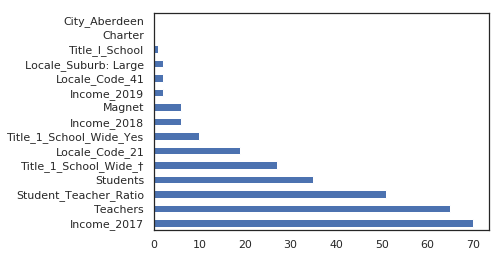

In [0]:
RMSE_full_features_percentage.append(split_and_train('Applications_1920_Complete_Students_Perc_Apr19_2019'))

Split done, calling trainer
Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l2: 0.00144302	valid_0's l1: 0.0303706
[20]	valid_0's l2: 0.00133708	valid_0's l1: 0.0291905
[30]	valid_0's l2: 0.00124281	valid_0's l1: 0.0279303
[40]	valid_0's l2: 0.00123048	valid_0's l1: 0.0278262
[50]	valid_0's l2: 0.00118728	valid_0's l1: 0.0270676
[60]	valid_0's l2: 0.00120618	valid_0's l1: 0.0274079
[70]	valid_0's l2: 0.00122049	valid_0's l1: 0.0276895
[80]	valid_0's l2: 0.00122005	valid_0's l1: 0.0273922
[90]	valid_0's l2: 0.0012242	valid_0's l1: 0.0275773
[100]	valid_0's l2: 0.00124667	valid_0's l1: 0.0279783
[110]	valid_0's l2: 0.00127759	valid_0's l1: 0.0284153
[120]	valid_0's l2: 0.00127278	valid_0's l1: 0.0284538
[130]	valid_0's l2: 0.00128459	valid_0's l1: 0.0285884
[140]	valid_0's l2: 0.00128364	valid_0's l1: 0.0285814
[150]	valid_0's l2: 0.0012929	valid_0's l1: 0.0287536
Early stopping, best iteration is:
[50]	valid_0's l2: 0.00118728	valid_0's

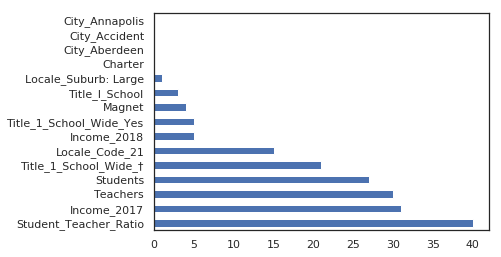

In [0]:
RMSE_full_features_percentage.append(split_and_train('Applications_1819_Complete_Students_Perc_Apr19_2018', predictors=predictor_cols.difference(['Income_2019'])))

In [0]:
sum(RMSE_full_features_percentage) / len(RMSE_full_features_percentage)

0.035623787432527

Looks like it's actually pretty accurate considering how low the RMSE is. The average RMSE error is about 3.56% which is pretty good considering that's within one standard deviation of the mean for all the statistics we described above for percentage. Now lets try it with only the good features.

#### Good features

In [0]:
RMSE_top_features_percentage = []

Split done, calling trainer
Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l2: 0.00148357	valid_0's l1: 0.0292077
[20]	valid_0's l2: 0.0013263	valid_0's l1: 0.0277373
[30]	valid_0's l2: 0.00127926	valid_0's l1: 0.0271542
[40]	valid_0's l2: 0.00126487	valid_0's l1: 0.0271059
[50]	valid_0's l2: 0.00127327	valid_0's l1: 0.027157
[60]	valid_0's l2: 0.00127018	valid_0's l1: 0.0270928
[70]	valid_0's l2: 0.00130126	valid_0's l1: 0.0274248
[80]	valid_0's l2: 0.00130982	valid_0's l1: 0.027582
[90]	valid_0's l2: 0.00132349	valid_0's l1: 0.0278562
[100]	valid_0's l2: 0.00132644	valid_0's l1: 0.0279801
[110]	valid_0's l2: 0.00130979	valid_0's l1: 0.0278095
[120]	valid_0's l2: 0.00132134	valid_0's l1: 0.0281272
[130]	valid_0's l2: 0.00132185	valid_0's l1: 0.02816
Early stopping, best iteration is:
[38]	valid_0's l2: 0.00126166	valid_0's l1: 0.0269491
Saving model...
Starting predicting...
The rmse of prediction is: 0.035519825481825244
Done! Print

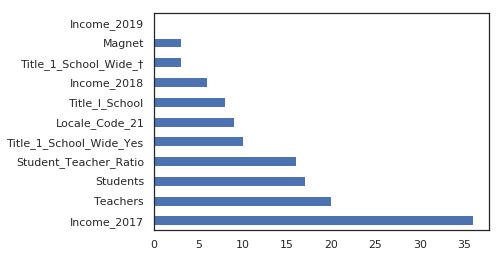

In [0]:
RMSE_top_features_percentage.append(split_and_train('Applications_1920_Submitted_Students_Perc_Apr19_2019', predictors=['Title_I_School', 
                                                                                    'Income_2017', 
                                                                                    'Income_2018', 
                                                                                    'Income_2019', 
                                                                                    'Students', 
                                                                                    'Student_Teacher_Ratio', 
                                                                                    'Teachers',
                                                                                    'Locale_Code_21',
                                                                                    'Title_1_School_Wide_†',
                                                                                    'Title_1_School_Wide_Yes', 
                                                                                    'Magnet']))

So, not much improvement, still within one std. deviation and only a slight (`.0002`) improvement by only using the important features. Weird that `Income_2019` dropped to being very unimportant, though I expected `Charter` not to mean much. Still weird that `Locale_Code_21` was **so** important. It makes me really wonder what it represents.

Split done, calling trainer
Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l2: 0.00142312	valid_0's l1: 0.0298846
[20]	valid_0's l2: 0.00136184	valid_0's l1: 0.0292258
[30]	valid_0's l2: 0.00129045	valid_0's l1: 0.0282892
[40]	valid_0's l2: 0.00129833	valid_0's l1: 0.0284858
[50]	valid_0's l2: 0.00127095	valid_0's l1: 0.0279043
[60]	valid_0's l2: 0.00131384	valid_0's l1: 0.0282867
[70]	valid_0's l2: 0.00133503	valid_0's l1: 0.0284851
[80]	valid_0's l2: 0.00133445	valid_0's l1: 0.0283589
[90]	valid_0's l2: 0.00136124	valid_0's l1: 0.0286787
[100]	valid_0's l2: 0.00138508	valid_0's l1: 0.0287972
[110]	valid_0's l2: 0.00140358	valid_0's l1: 0.0287576
[120]	valid_0's l2: 0.001426	valid_0's l1: 0.0290614
[130]	valid_0's l2: 0.0014506	valid_0's l1: 0.0290508
[140]	valid_0's l2: 0.00144423	valid_0's l1: 0.0288347
[150]	valid_0's l2: 0.0014772	valid_0's l1: 0.0292715
Early stopping, best iteration is:
[50]	valid_0's l2: 0.00127095	valid_0's l

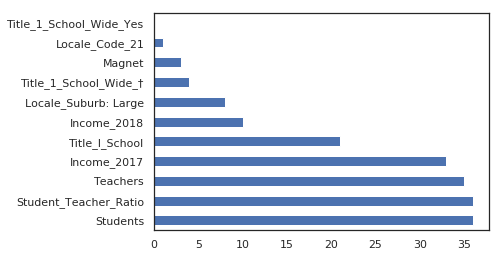

In [0]:
RMSE_top_features_percentage.append(split_and_train('Applications_1819_Submitted_Students_Perc_Apr19_2018', predictors=['Title_I_School', 
                                                                                    'Income_2017', 
                                                                                    'Income_2018', 
                                                                                    'Students', 
                                                                                    'Student_Teacher_Ratio', 
                                                                                    'Teachers',
                                                                                    'Locale_Suburb: Large',
                                                                                    'Locale_Code_21',
                                                                                    'Title_1_School_Wide_†',
                                                                                    'Title_1_School_Wide_Yes', 
                                                                                    'Magnet']))

This percentage model also got a small boost from only using important features, as we'd expect it to do so. Around the same gain as the previous one. Nothing terribly unexpected in the feature importances.

Split done, calling trainer
Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l2: 0.00167535	valid_0's l1: 0.0304211
[20]	valid_0's l2: 0.00147563	valid_0's l1: 0.0288455
[30]	valid_0's l2: 0.00141757	valid_0's l1: 0.0283949
[40]	valid_0's l2: 0.00137903	valid_0's l1: 0.0278632
[50]	valid_0's l2: 0.00136823	valid_0's l1: 0.0277682
[60]	valid_0's l2: 0.00135036	valid_0's l1: 0.0275822
[70]	valid_0's l2: 0.00135707	valid_0's l1: 0.0276827
[80]	valid_0's l2: 0.00135092	valid_0's l1: 0.027448
[90]	valid_0's l2: 0.0013481	valid_0's l1: 0.0276172
[100]	valid_0's l2: 0.00134086	valid_0's l1: 0.0276139
[110]	valid_0's l2: 0.00131954	valid_0's l1: 0.0275894
[120]	valid_0's l2: 0.00131909	valid_0's l1: 0.0278758
[130]	valid_0's l2: 0.00131224	valid_0's l1: 0.0277212
[140]	valid_0's l2: 0.00131976	valid_0's l1: 0.0278348
[150]	valid_0's l2: 0.00132963	valid_0's l1: 0.027883
[160]	valid_0's l2: 0.00132681	valid_0's l1: 0.0279015
[170]	valid_0's l2: 

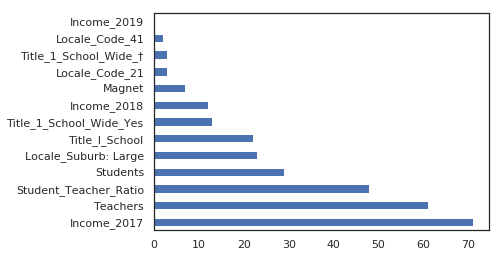

In [0]:
RMSE_top_features_percentage.append(split_and_train('Applications_1920_Complete_Students_Perc_Apr19_2019', predictors=['Title_I_School', 
                                                                                    'Income_2017', 
                                                                                    'Income_2018', 
                                                                                    'Students', 
                                                                                    'Student_Teacher_Ratio', 
                                                                                    'Teachers',
                                                                                    'Locale_Suburb: Large',
                                                                                    'Locale_Code_21',
                                                                                    'Title_1_School_Wide_†',
                                                                                    'Title_1_School_Wide_Yes', 
                                                                                    'Magnet', 
                                                                                    'Income_2019',
                                                                                    'Locale_Code_41']))

Split done, calling trainer
Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l2: 0.00145389	valid_0's l1: 0.0303577
[20]	valid_0's l2: 0.00133888	valid_0's l1: 0.0291175
[30]	valid_0's l2: 0.00126243	valid_0's l1: 0.0281545
[40]	valid_0's l2: 0.00124344	valid_0's l1: 0.0280226
[50]	valid_0's l2: 0.0011964	valid_0's l1: 0.027254
[60]	valid_0's l2: 0.00120786	valid_0's l1: 0.0274197
[70]	valid_0's l2: 0.00121085	valid_0's l1: 0.0274388
[80]	valid_0's l2: 0.00120618	valid_0's l1: 0.0272169
[90]	valid_0's l2: 0.00121101	valid_0's l1: 0.0273877
[100]	valid_0's l2: 0.00123324	valid_0's l1: 0.0278047
[110]	valid_0's l2: 0.00126061	valid_0's l1: 0.0281244
[120]	valid_0's l2: 0.00125671	valid_0's l1: 0.0282352
[130]	valid_0's l2: 0.00126564	valid_0's l1: 0.0282883
[140]	valid_0's l2: 0.0012738	valid_0's l1: 0.0284157
[150]	valid_0's l2: 0.0012835	valid_0's l1: 0.0286605
[160]	valid_0's l2: 0.00128781	valid_0's l1: 0.028856
[170]	valid_0's l2: 0.

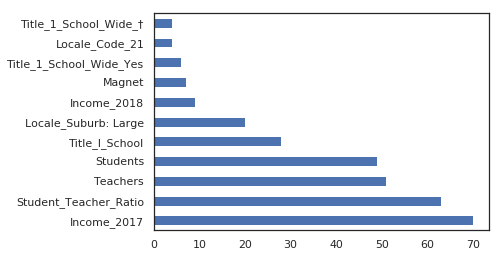

In [0]:
RMSE_top_features_percentage.append(split_and_train('Applications_1819_Complete_Students_Perc_Apr19_2018', predictors=['Title_I_School', 
                                                                                    'Income_2017', 
                                                                                    'Income_2018', 
                                                                                    'Students', 
                                                                                    'Student_Teacher_Ratio', 
                                                                                    'Teachers',
                                                                                    'Locale_Suburb: Large',
                                                                                    'Locale_Code_21',
                                                                                    'Title_1_School_Wide_†',
                                                                                    'Title_1_School_Wide_Yes', 
                                                                                    'Magnet']))

In [0]:
sum(RMSE_top_features_percentage)/len(RMSE_top_features_percentage)

0.03558226554478634

Slight improvement overall on the average RMSE for the percentage ones. Now we're going to try the raw numbers.

### Raw Numbers

I expect for the raw numbers, the column `Students` will be one of the most important for every run, as the algorithm not only has to predict how many students will interact with the FAFSA but also how many students the school has as a whole. It's also possible because of that it will care about the `Grades` feature, which was one I engineered by subtracting `Low_Grade` from `High_Grade`.

#### All Features

In [0]:
RMSE_full_features_raw = []

Split done, calling trainer
Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l2: 4520.25	valid_0's l1: 58.9318
[20]	valid_0's l2: 2521.79	valid_0's l1: 42.488
[30]	valid_0's l2: 1825.4	valid_0's l1: 34.6099
[40]	valid_0's l2: 1481.26	valid_0's l1: 30.2351
[50]	valid_0's l2: 1352.67	valid_0's l1: 28.6881
[60]	valid_0's l2: 1325.36	valid_0's l1: 29.1473
[70]	valid_0's l2: 1269.47	valid_0's l1: 28.8134
[80]	valid_0's l2: 1234.97	valid_0's l1: 28.3981
[90]	valid_0's l2: 1239.86	valid_0's l1: 28.2706
[100]	valid_0's l2: 1229.24	valid_0's l1: 28.1241
[110]	valid_0's l2: 1251.87	valid_0's l1: 28.463
[120]	valid_0's l2: 1260.48	valid_0's l1: 28.4259
[130]	valid_0's l2: 1251.69	valid_0's l1: 28.2491
[140]	valid_0's l2: 1243.84	valid_0's l1: 28.0605
[150]	valid_0's l2: 1246.87	valid_0's l1: 28.099
[160]	valid_0's l2: 1231.09	valid_0's l1: 27.9293
[170]	valid_0's l2: 1236.94	valid_0's l1: 28.0122
[180]	valid_0's l2: 1239.6	valid_0's l1: 27.8441
[1

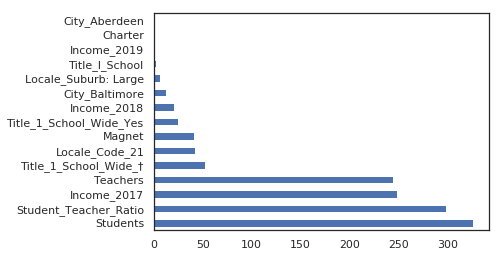

In [0]:
RMSE_full_features_raw.append(split_and_train('Applications_1920_Submitted_Apr19_2019'))

A RMSE of 34.38 is actually pretty good considering the standard deviation for this data is in the 90's. As I predicted, the 

Split done, calling trainer
Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l2: 4314.56	valid_0's l1: 57.5279
[20]	valid_0's l2: 2440.51	valid_0's l1: 41.8272
[30]	valid_0's l2: 1762.13	valid_0's l1: 34.1042
[40]	valid_0's l2: 1443.18	valid_0's l1: 30.0908
[50]	valid_0's l2: 1301.5	valid_0's l1: 28.4316
[60]	valid_0's l2: 1286.29	valid_0's l1: 28.9644
[70]	valid_0's l2: 1224.05	valid_0's l1: 28.4085
[80]	valid_0's l2: 1184.51	valid_0's l1: 28.0112
[90]	valid_0's l2: 1181.66	valid_0's l1: 27.7351
[100]	valid_0's l2: 1165.51	valid_0's l1: 27.3773
[110]	valid_0's l2: 1189	valid_0's l1: 27.7943
[120]	valid_0's l2: 1186.26	valid_0's l1: 27.6051
[130]	valid_0's l2: 1174.14	valid_0's l1: 27.3978
[140]	valid_0's l2: 1169.77	valid_0's l1: 27.2505
[150]	valid_0's l2: 1168.39	valid_0's l1: 27.1712
[160]	valid_0's l2: 1155.85	valid_0's l1: 27.0596
[170]	valid_0's l2: 1162.57	valid_0's l1: 27.1862
[180]	valid_0's l2: 1168.72	valid_0's l1: 27.0691
[

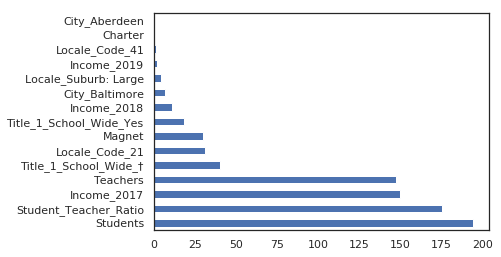

In [0]:
RMSE_full_features_raw.append(split_and_train('Applications_1920_Complete_Apr19_2019'))

Split done, calling trainer
Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l2: 4579.08	valid_0's l1: 57.2567
[20]	valid_0's l2: 2757.72	valid_0's l1: 44.1277
[30]	valid_0's l2: 2003.45	valid_0's l1: 36.5685
[40]	valid_0's l2: 1641.17	valid_0's l1: 32.4287
[50]	valid_0's l2: 1488.26	valid_0's l1: 30.4283
[60]	valid_0's l2: 1449.58	valid_0's l1: 29.7887
[70]	valid_0's l2: 1389.93	valid_0's l1: 29.2866
[80]	valid_0's l2: 1336.52	valid_0's l1: 28.8915
[90]	valid_0's l2: 1347.97	valid_0's l1: 29.1418
[100]	valid_0's l2: 1343.66	valid_0's l1: 29.0638
[110]	valid_0's l2: 1347.53	valid_0's l1: 28.9657
[120]	valid_0's l2: 1345.43	valid_0's l1: 28.9405
[130]	valid_0's l2: 1350.59	valid_0's l1: 28.8807
[140]	valid_0's l2: 1350.09	valid_0's l1: 28.743
[150]	valid_0's l2: 1366.12	valid_0's l1: 28.7567
[160]	valid_0's l2: 1377.5	valid_0's l1: 28.8357
[170]	valid_0's l2: 1377.73	valid_0's l1: 28.8438
[180]	valid_0's l2: 1381.15	valid_0's l1: 28.8939

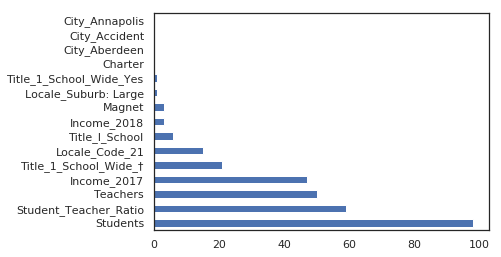

In [0]:
RMSE_full_features_raw.append(split_and_train('Applications_1819_Submitted_Apr19_2018', predictors=predictor_cols.difference(['Income_2019'])))

Split done, calling trainer
Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l2: 4219.5	valid_0's l1: 55.6756
[20]	valid_0's l2: 2549.97	valid_0's l1: 42.8382
[30]	valid_0's l2: 1872.31	valid_0's l1: 35.8192
[40]	valid_0's l2: 1560.64	valid_0's l1: 32.259
[50]	valid_0's l2: 1431.15	valid_0's l1: 30.4768
[60]	valid_0's l2: 1398.29	valid_0's l1: 29.6881
[70]	valid_0's l2: 1341.77	valid_0's l1: 28.9871
[80]	valid_0's l2: 1272.61	valid_0's l1: 28.3582
[90]	valid_0's l2: 1280.34	valid_0's l1: 28.4415
[100]	valid_0's l2: 1276.73	valid_0's l1: 28.356
[110]	valid_0's l2: 1281.91	valid_0's l1: 28.3643
[120]	valid_0's l2: 1287.31	valid_0's l1: 28.3843
[130]	valid_0's l2: 1288.64	valid_0's l1: 28.307
[140]	valid_0's l2: 1291.22	valid_0's l1: 28.2408
[150]	valid_0's l2: 1305.47	valid_0's l1: 28.2394
[160]	valid_0's l2: 1318.77	valid_0's l1: 28.333
[170]	valid_0's l2: 1335.62	valid_0's l1: 28.3903
[180]	valid_0's l2: 1337.36	valid_0's l1: 28.5113
Ea

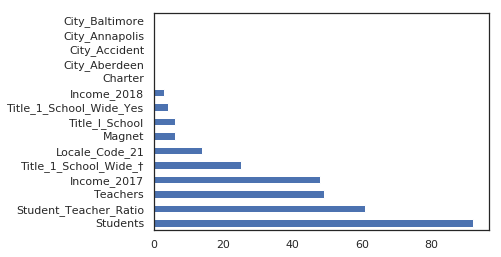

In [0]:
RMSE_full_features_raw.append(split_and_train('Applications_1819_Complete_Apr19_2018', predictors=predictor_cols.difference(['Income_2019'])))

Weird that `Locale_Suburb: Large` dropped off the features on this experiment. It's not terribly different than all the others so I'd expect it to show up here.

In [0]:
sum(RMSE_full_features_raw) / len(RMSE_full_features_raw)

35.02188056911061

So `35.02188` isn't bad considering the standard deviation of most of the data is in the 90's. Now lets limit it to the top features and see if we can get an improvement. We probably will see at least **some** improvement, considering that's usually the case with boosting.

Also noteworthy is that the top feature of each model was students, as I predicted it might be.

#### Top Features

In [0]:
RMSE_top_features_raw = []

Split done, calling trainer
Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l2: 4420.59	valid_0's l1: 58.1903
[20]	valid_0's l2: 2495.15	valid_0's l1: 41.9975
[30]	valid_0's l2: 1763.09	valid_0's l1: 33.8471
[40]	valid_0's l2: 1461.19	valid_0's l1: 30.0159
[50]	valid_0's l2: 1326.08	valid_0's l1: 28.4889
[60]	valid_0's l2: 1314.37	valid_0's l1: 29.0223
[70]	valid_0's l2: 1267.12	valid_0's l1: 28.7536
[80]	valid_0's l2: 1232.85	valid_0's l1: 28.3306
[90]	valid_0's l2: 1239	valid_0's l1: 28.3209
[100]	valid_0's l2: 1235.55	valid_0's l1: 28.3131
[110]	valid_0's l2: 1260.27	valid_0's l1: 28.6517
[120]	valid_0's l2: 1259.85	valid_0's l1: 28.5224
[130]	valid_0's l2: 1251.79	valid_0's l1: 28.2509
[140]	valid_0's l2: 1250.06	valid_0's l1: 28.334
[150]	valid_0's l2: 1254.61	valid_0's l1: 28.38
[160]	valid_0's l2: 1230.14	valid_0's l1: 28.0815
[170]	valid_0's l2: 1238.57	valid_0's l1: 28.1819
[180]	valid_0's l2: 1240.63	valid_0's l1: 28.0265
[19

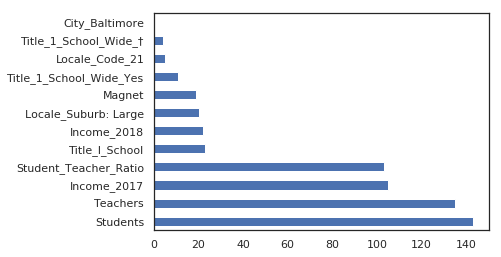

In [0]:
RMSE_top_features_raw.append(split_and_train('Applications_1920_Submitted_Apr19_2019', predictors=['Title_I_School', 
                                                                                                    'Income_2017', 
                                                                                                    'Income_2018', 
                                                                                                    'Students', 
                                                                                                    'Student_Teacher_Ratio', 
                                                                                                    'Teachers',
                                                                                                    'Locale_Suburb: Large',
                                                                                                    'Locale_Code_21',
                                                                                                    'Title_1_School_Wide_†',
                                                                                                    'Title_1_School_Wide_Yes', 
                                                                                                    'Magnet',
                                                                                                    'City_Baltimore']))

Wow. I'm very surprised that `City_Baltimore` completely dropped off the map when we only used the top features, while `Locale_Suburb: Large` gained a couple of spots in the top features. This actually did slightly worse that the all features, though is still within the same ballpark.

Split done, calling trainer
Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l2: 4237.12	valid_0's l1: 57.0732
[20]	valid_0's l2: 2431.94	valid_0's l1: 41.8628
[30]	valid_0's l2: 1762.44	valid_0's l1: 34.2277
[40]	valid_0's l2: 1443.69	valid_0's l1: 30.0921
[50]	valid_0's l2: 1314.93	valid_0's l1: 28.6259
[60]	valid_0's l2: 1313.09	valid_0's l1: 29.3054
[70]	valid_0's l2: 1263.49	valid_0's l1: 28.8548
[80]	valid_0's l2: 1226.53	valid_0's l1: 28.5094
[90]	valid_0's l2: 1224.13	valid_0's l1: 28.3285
[100]	valid_0's l2: 1195.9	valid_0's l1: 27.745
[110]	valid_0's l2: 1214.99	valid_0's l1: 28.0755
[120]	valid_0's l2: 1212.19	valid_0's l1: 27.9399
[130]	valid_0's l2: 1198.13	valid_0's l1: 27.8594
[140]	valid_0's l2: 1191.8	valid_0's l1: 27.719
[150]	valid_0's l2: 1196.02	valid_0's l1: 27.7314
[160]	valid_0's l2: 1176.73	valid_0's l1: 27.5119
[170]	valid_0's l2: 1188	valid_0's l1: 27.6642
[180]	valid_0's l2: 1192.65	valid_0's l1: 27.542
[190]

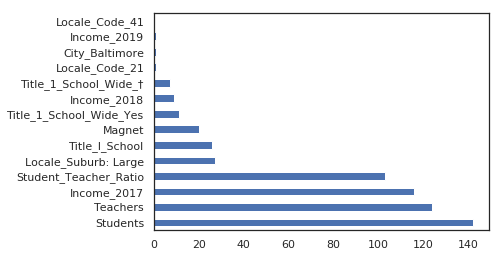

In [0]:
RMSE_top_features_raw.append(split_and_train('Applications_1920_Complete_Apr19_2019', predictors=['Title_I_School', 
                                                                                                    'Income_2017', 
                                                                                                    'Income_2018', 
                                                                                                    'Students', 
                                                                                                    'Student_Teacher_Ratio', 
                                                                                                    'Teachers',
                                                                                                    'Locale_Suburb: Large',
                                                                                                    'Locale_Code_21',
                                                                                                    'Title_1_School_Wide_†',
                                                                                                    'Title_1_School_Wide_Yes', 
                                                                                                    'Magnet',
                                                                                                    'City_Baltimore',
                                                                                                    'Locale_Code_41',
                                                                                                    'Income_2019']))

Not unexpected to see the `Locale_Code_41` drop off the top features list when we limit the number of features. Though it is quite weird to see `Locale_Code_21`, which was rather high previously drop all the way down.

Split done, calling trainer
Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l2: 4609.7	valid_0's l1: 57.8247
[20]	valid_0's l2: 2745.56	valid_0's l1: 44.3072
[30]	valid_0's l2: 2003	valid_0's l1: 36.8609
[40]	valid_0's l2: 1650.72	valid_0's l1: 32.7509
[50]	valid_0's l2: 1508.45	valid_0's l1: 30.7918
[60]	valid_0's l2: 1467.6	valid_0's l1: 30.0498
[70]	valid_0's l2: 1404.65	valid_0's l1: 29.4469
[80]	valid_0's l2: 1337.57	valid_0's l1: 28.9456
[90]	valid_0's l2: 1342.66	valid_0's l1: 29.0821
[100]	valid_0's l2: 1335.58	valid_0's l1: 28.9868
[110]	valid_0's l2: 1335.81	valid_0's l1: 28.898
[120]	valid_0's l2: 1330.96	valid_0's l1: 28.7583
[130]	valid_0's l2: 1345.91	valid_0's l1: 28.7886
[140]	valid_0's l2: 1340.61	valid_0's l1: 28.6298
[150]	valid_0's l2: 1359.13	valid_0's l1: 28.7141
[160]	valid_0's l2: 1367.21	valid_0's l1: 28.7805
[170]	valid_0's l2: 1367.49	valid_0's l1: 28.7963
[180]	valid_0's l2: 1380.8	valid_0's l1: 28.9608
[190

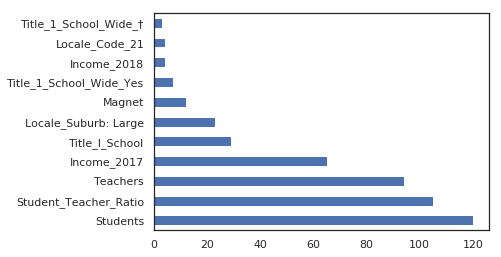

In [0]:
RMSE_top_features_raw.append(split_and_train('Applications_1819_Submitted_Apr19_2018', predictors=['Title_I_School', 
                                                                                                    'Income_2017', 
                                                                                                    'Income_2018', 
                                                                                                    'Students', 
                                                                                                    'Student_Teacher_Ratio', 
                                                                                                    'Teachers',
                                                                                                    'Locale_Suburb: Large',
                                                                                                    'Locale_Code_21',
                                                                                                    'Title_1_School_Wide_†',
                                                                                                    'Title_1_School_Wide_Yes', 
                                                                                                    'Magnet']))

Weird seeing `Title_1_School_Wide_Cross` drop so low from where it was above.

Split done, calling trainer
Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l2: 4263.66	valid_0's l1: 55.8155
[20]	valid_0's l2: 2533.15	valid_0's l1: 42.8594
[30]	valid_0's l2: 1880.09	valid_0's l1: 35.9931
[40]	valid_0's l2: 1569.03	valid_0's l1: 32.3859
[50]	valid_0's l2: 1433.68	valid_0's l1: 30.6073
[60]	valid_0's l2: 1376.42	valid_0's l1: 29.5716
[70]	valid_0's l2: 1332.66	valid_0's l1: 29.0503
[80]	valid_0's l2: 1272.59	valid_0's l1: 28.5649
[90]	valid_0's l2: 1285.07	valid_0's l1: 28.611
[100]	valid_0's l2: 1286.39	valid_0's l1: 28.5686
[110]	valid_0's l2: 1284.09	valid_0's l1: 28.5451
[120]	valid_0's l2: 1281.29	valid_0's l1: 28.5826
[130]	valid_0's l2: 1287.74	valid_0's l1: 28.5475
[140]	valid_0's l2: 1287.5	valid_0's l1: 28.4838
[150]	valid_0's l2: 1302.27	valid_0's l1: 28.4512
[160]	valid_0's l2: 1305.62	valid_0's l1: 28.4154
[170]	valid_0's l2: 1324.61	valid_0's l1: 28.5669
[180]	valid_0's l2: 1333.08	valid_0's l1: 28.7264

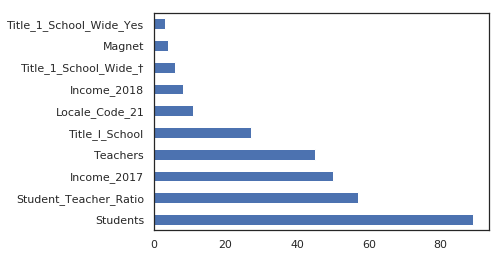

In [0]:
RMSE_top_features_raw.append(split_and_train('Applications_1819_Complete_Apr19_2018', predictors=['Title_I_School', 
                                                                                                    'Income_2017', 
                                                                                                    'Income_2018', 
                                                                                                    'Students', 
                                                                                                    'Student_Teacher_Ratio', 
                                                                                                    'Teachers',
                                                                                                    'Locale_Code_21',
                                                                                                    'Title_1_School_Wide_†',
                                                                                                    'Title_1_School_Wide_Yes', 
                                                                                                    'Magnet']))

In [0]:
sum(RMSE_top_features_raw)/len(RMSE_top_features_raw)

35.300071249051314

**Wow!** Very surprising to see that the average root mean squared error went up in the better features. That's atypical of most boosting models.